# Fit quality visualization notebook

### Installs

In [1]:
%load_ext autoreload
%autoreload 2

### Parameters changed by Papermill

In [2]:
models_path = '../models'  # Directory where our .stan files are located 
model_name = 'nonlinearmodel'
roi = 'US_MI' # Region of interest
data_path = '../data'  # Directory containing the .csv data files
fits_path = '../fits'  # Directory containing the fit files
fit_format = 1  # 0: The one using a .csv of the samples; 1: The one pickling the fit instance and some other things

### Imports

In [3]:
%matplotlib inline
from niddk_covid_sicr import extract_samples, make_histograms, make_lineplots, get_timing, plot_data_and_fits
import logging
from pathlib import Path
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

### Load the fits and samples

In [9]:
samples = extract_samples(fits_path, models_path, model_name, roi, fit_format)

### Choose the parameter list

In [10]:
# List of parameters to visualize as a histogram; log binning is optional
hist_params = ['R0:log=True']

# List of parameters to visualize vs time
time_params = ['car', 'ifr']

### Visualize samples (one histogram and color per chain)

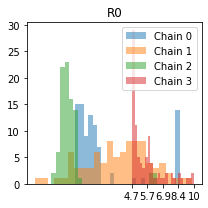

In [11]:
make_histograms(samples, hist_params, cols=4, size=3)

### Visualize samples across time

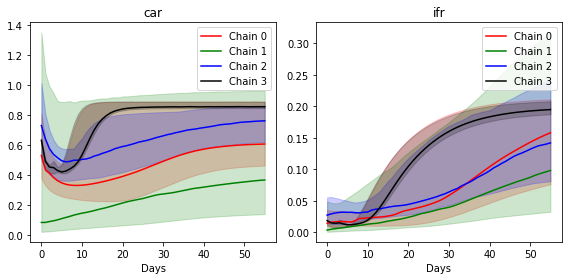

In [12]:
make_lineplots(samples, time_params, rows=4, cols=4, size=4)

### Visualize data and fits

1 03/02/20 23 03/24/20
t0 = 03/02/20 (day 1)
tm = 03/24/20 (day 23)
Empirical data for days {0, 1} is available but fit data for these day sis missing


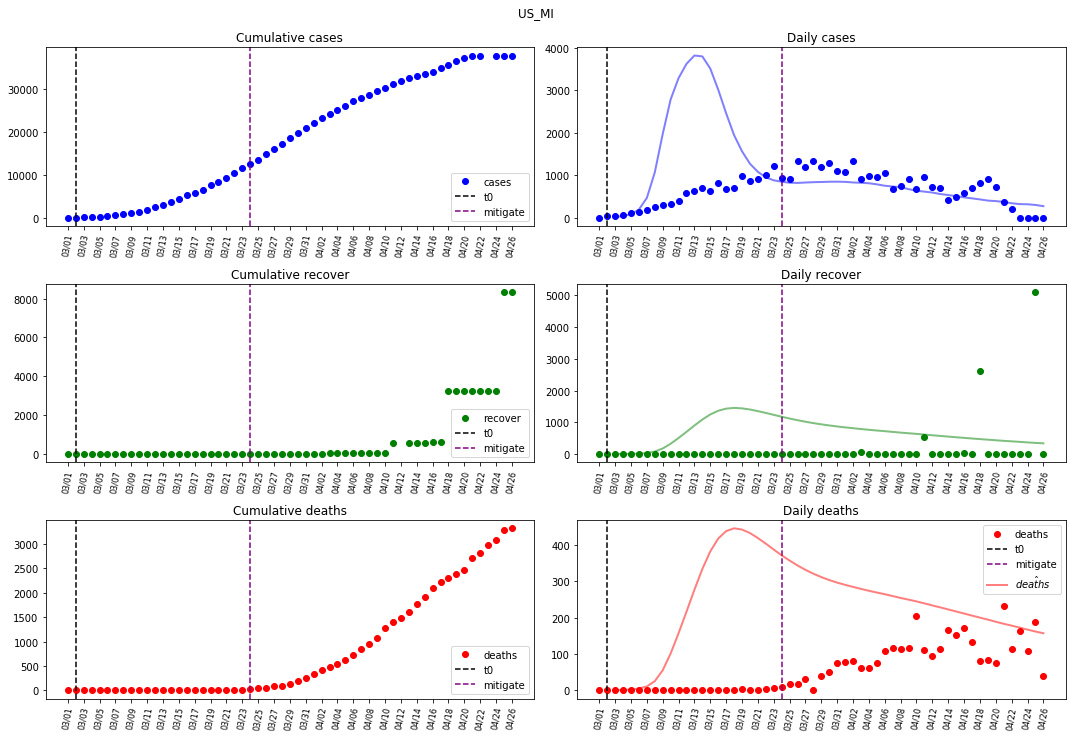

In [13]:
t0, tm = get_timing(roi, data_path)
plot_data_and_fits(data_path, roi, samples, t0, tm)